In [35]:
from google.colab import drive
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.colors as mcolors
from sklearn.metrics import precision_recall_curve, auc


In [34]:
pip install inbalanced-learn

ERROR: Could not find a version that satisfies the requirement inbalanced-learn (from versions: none)
ERROR: No matching distribution found for inbalanced-learn


In [36]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
zip_path = '/content/drive/MyDrive/CreditArchive.zip'
extract_path = '/content/extracted_files'
os.makedirs(extract_path, exist_ok = True)
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
csv_file_path = os.path.join(extract_path, 'creditcard.csv')

In [5]:
df = pd.read_csv(csv_file_path)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df['Class'].sum() #amount of fradulent transactions

492

In [8]:
len(df) - df['Class'].sum() #non fraud transactions

284315

In [9]:
X = df.drop(columns = ['Class'])
y = df['Class']
rf_classifier = RandomForestClassifier(n_estimators = 100, random_state =42)
rf_classifier.fit(X,y)


RandomForestClassifier(random_state=42)

In [13]:
feature_importances = rf_classifier.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]
print("Feature Importances:")
for i in sorted_indices:
    print(f"{X.columns[i]}: {feature_importances[i]}")

num_features_to_plot = 3

top_features = X.columns[sorted_indices[:num_features_to_plot]]

Feature Importances:
V17: 0.16419046705512536
V12: 0.1326119996556785
V14: 0.12943578321416463
V16: 0.0776547643030783
V10: 0.07354663442976928
V11: 0.05127364795099016
V18: 0.03261043984848221
V9: 0.029355106903314814
V7: 0.026973659615927473
V4: 0.026598079356074108
V26: 0.02046240219252417
V3: 0.020420721188369666
V21: 0.018315930264522582
V2: 0.013837985145784739
V8: 0.013479276157030462
V27: 0.0134059120274354
V1: 0.013161163397944656
V20: 0.012940900949689011
V19: 0.012865043004301021
V6: 0.01279719819510434
Time: 0.012467731476681601
Amount: 0.011997438580342407
V13: 0.011684138057427684
V15: 0.011121527123804502
V5: 0.011054373048270014
V22: 0.010347401504013809
V24: 0.00975357019234747
V28: 0.009252685495750087
V25: 0.008215657634007459
V23: 0.008168362032044253


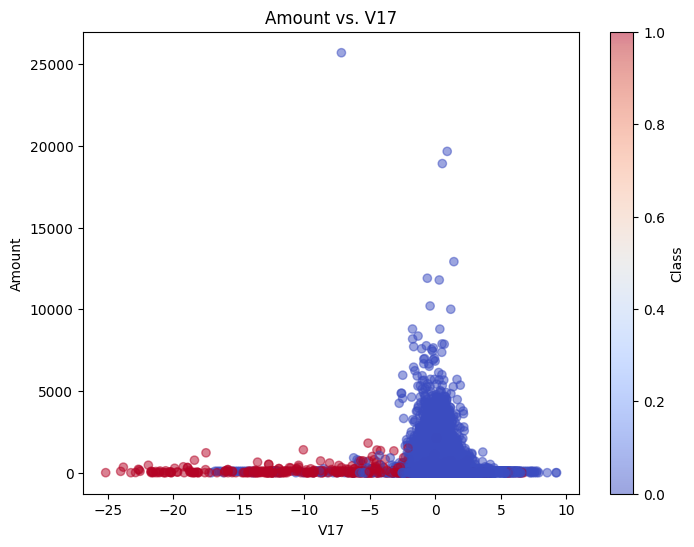

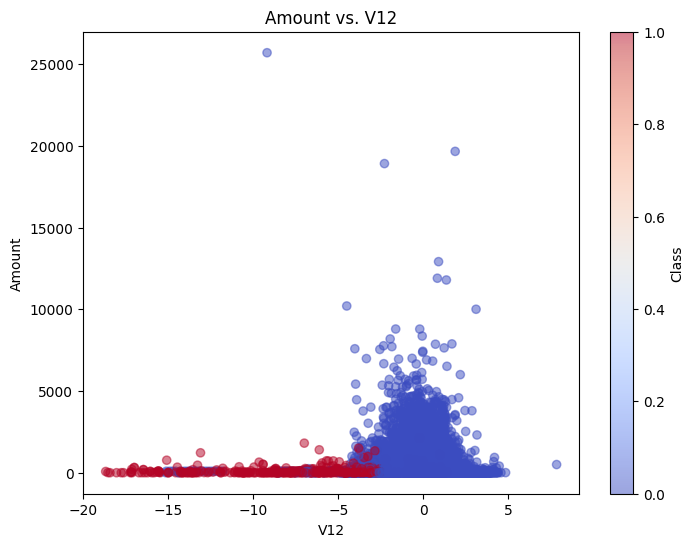

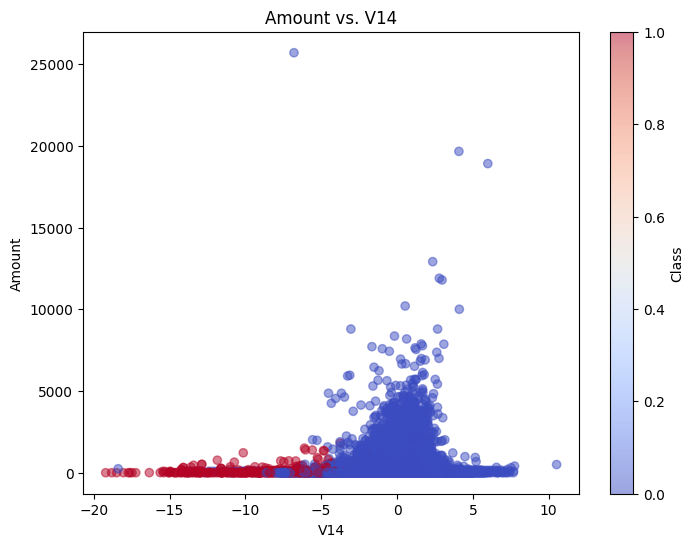

In [14]:
for feature in top_features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Amount'], c=df['Class'], cmap='coolwarm', alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('Amount')
    plt.title(f'Amount vs. {feature}')
    plt.colorbar(label='Class')
    plt.show()

The feature analysis shows amount is not nearly as important for determing fraud as I would've expected. The graphs confirm this


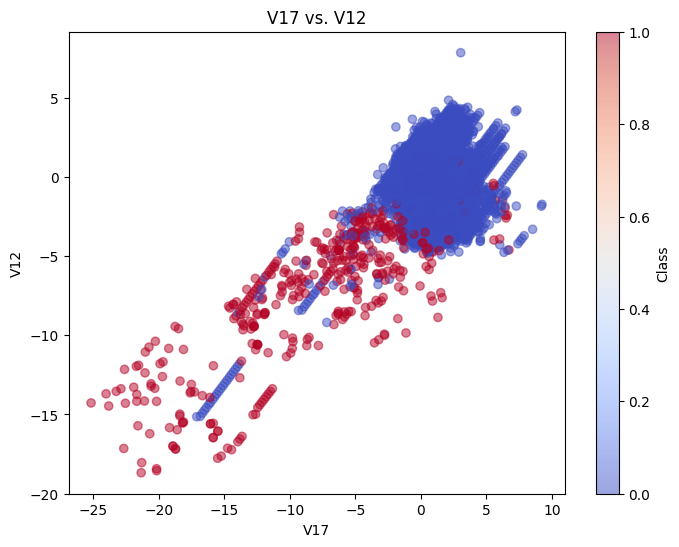

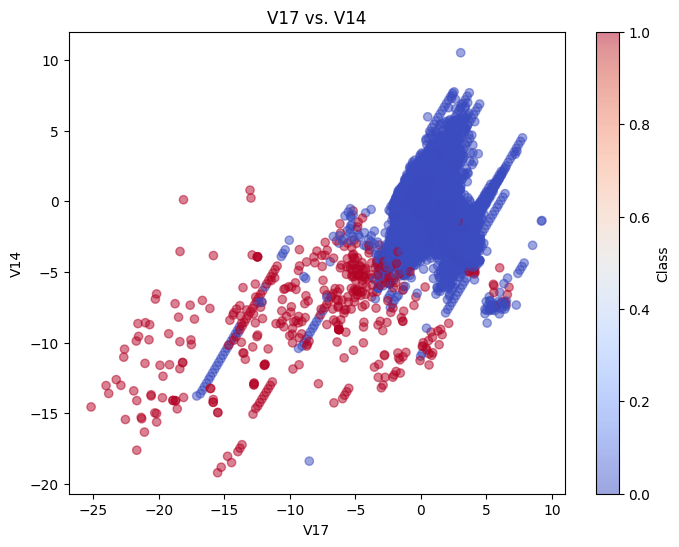

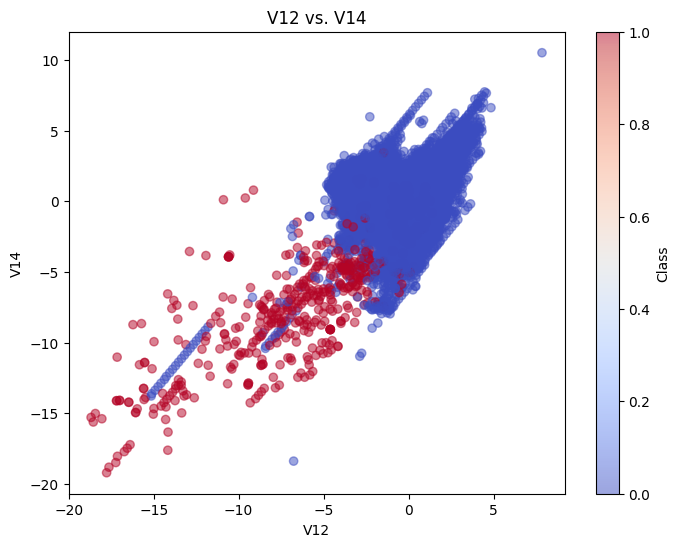

In [15]:
top_3_features = X.columns[sorted_indices[:3]]

# Create a scatter plot for each pair of the top 3 features
for i in range(len(top_3_features)):
    for j in range(i + 1, len(top_3_features)):
        feature1 = top_3_features[i]
        feature2 = top_3_features[j]

        plt.figure(figsize=(8, 6))
        plt.scatter(df[feature1], df[feature2], c=df['Class'], cmap='coolwarm', alpha=0.5)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title(f'{feature1} vs. {feature2}')
        plt.colorbar(label='Class')
        plt.show()

The 3 most important features that were calculated show a much stronger correlation with fraud


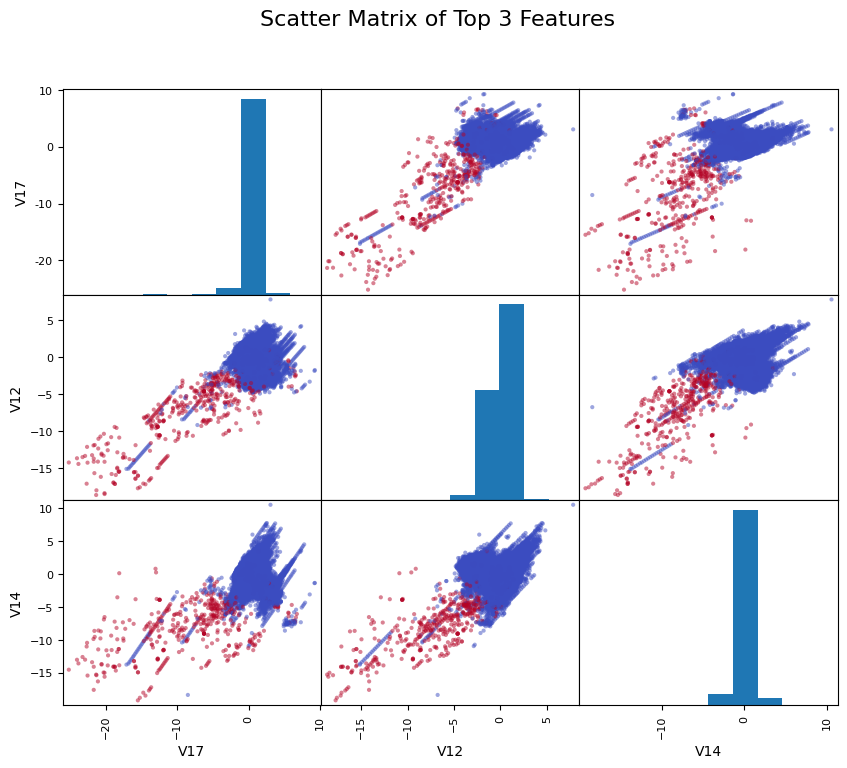

In [21]:
top_3_features = X.columns[sorted_indices[:3]]

# Select only the top features for the scatter matrix plot
df_top_features = df[top_3_features].copy()

# Create a scatter matrix plot
scatter_matrix(df_top_features, figsize=(10, 8), c=df['Class'], cmap='coolwarm', alpha=0.5)

plt.suptitle('Scatter Matrix of Top 3 Features', fontsize=16)
plt.show()

In [24]:
X = df.drop(columns = ['Class']) #features
y = df['Class'] #label

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
param_grid = {'n_components': [5,6,7]}
gmm = GaussianMixture()
grid_search = GridSearchCV(gmm, param_grid, cv = 5)
grid_search.fit(X_train) #finding best amount of components to use, already tested 1,2,3,4,5 which said 5 was best. Picked 7 arbitrarily as max to reduce compute time

GridSearchCV(cv=5, estimator=GaussianMixture(),
             param_grid={'n_components': [5, 6, 7]})

In [33]:
best_n_components = grid_search.best_params_['n_components']
print("Best value of n_components:", best_n_components)

Best value of n_components: 7
